In [1]:
!pip install geopandas

--- DIAGNÓSTICO DOS DADOS ---

.info() - Informações sobre as colunas:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   BAIRRO    36 non-null     object  
 1   REG_ADM   36 non-null     object  
 2   N_        36 non-null     object  
 3   Lei_n_    36 non-null     object  
 4   geometry  36 non-null     geometry
dtypes: geometry(1), object(4)
memory usage: 1.5+ KB

.head() - Primeiras 5 linhas:
            BAIRRO REG_ADM  N_                                Lei_n_  \
0            Rocas   Leste  09  LEI Nº 4.330, DE 05 DE ABRIL DE 1993   
1    Praia do Meio   Leste  11      LEI N  4328, DE 05 ABRIL DE 1993   
2         Neópolis     Sul  34      LEI N  4328, DE 05 ABRIL DE 1993   
3      Capim Macio     Sul  35      LEI N  4328, DE 05 ABRIL DE 1993   
4  Nova Descoberta     Sul  26     LEI N  4328, DE  05 ABRIL DE 1993   

                      

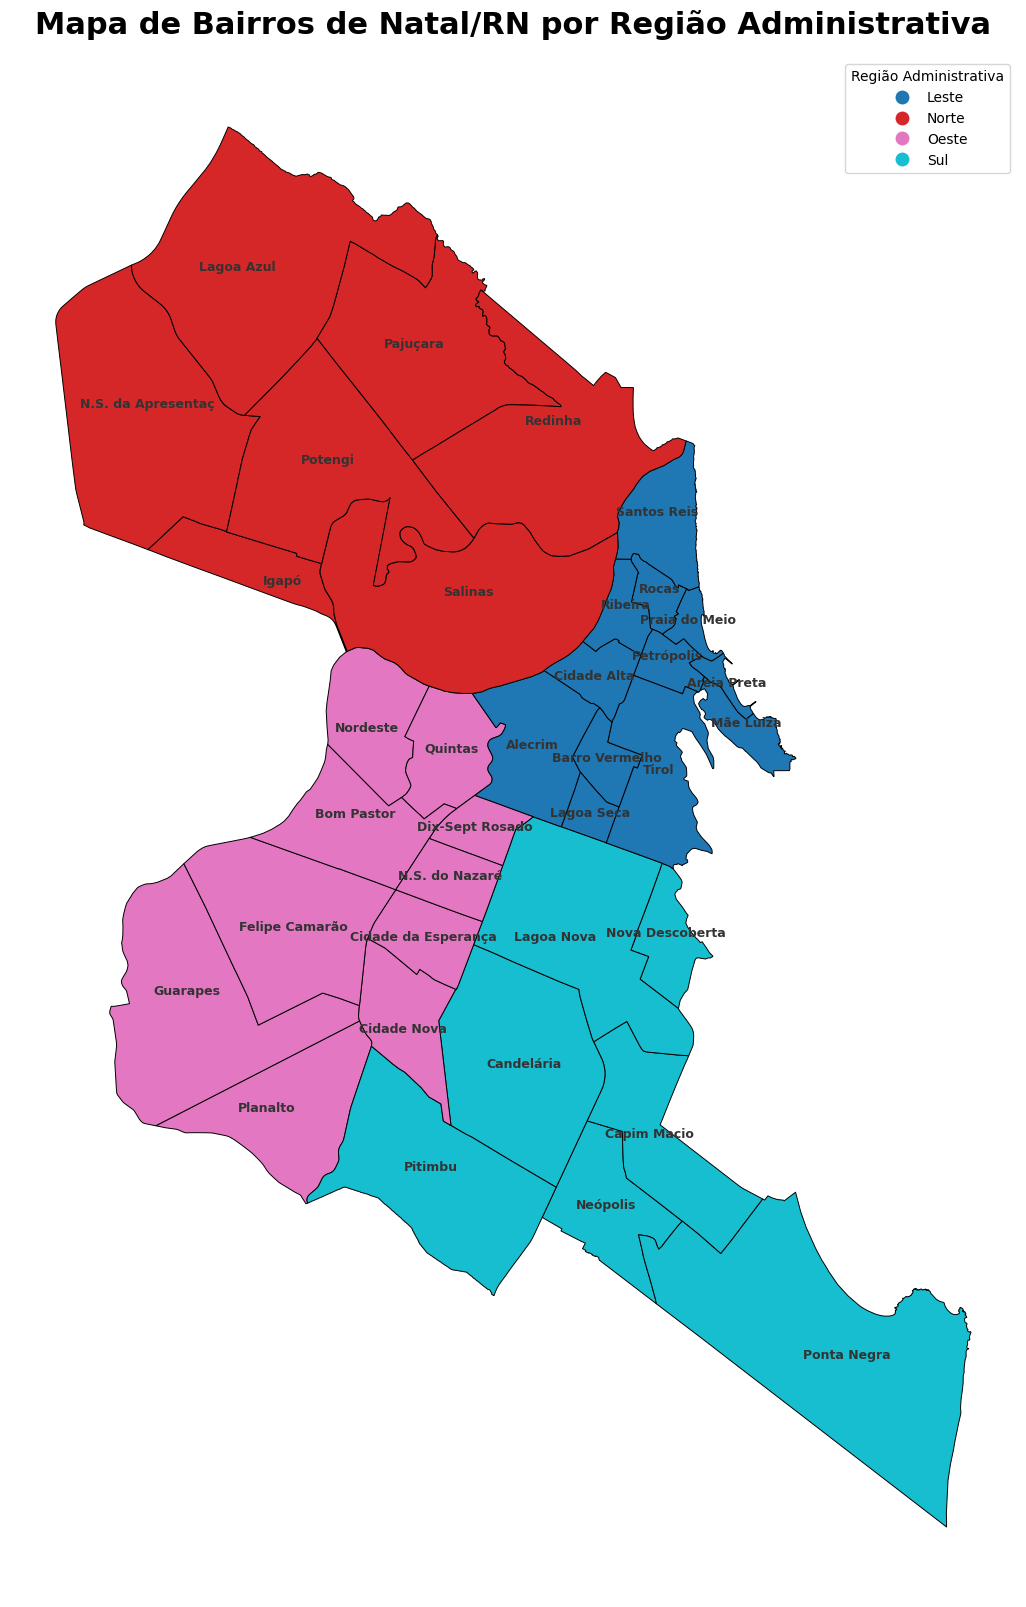


--- SÍNTESE EXECUTIVA ---
Análise concluída. O mapa visualiza 36 bairros, agrupados em 4 Regiões Administrativas.


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- PASSO 1 (DIAGNÓSTICO) E PASSO 2 (PRÉ-PROCESSAMENTO) ---
# Carregar o shapefile (ele encontrará os outros arquivos automaticamente)
shp_file = "Limite_Bairros.shp"
gdf = gpd.read_file(shp_file)

print("--- DIAGNÓSTICO DOS DADOS ---")
print("\n.info() - Informações sobre as colunas:")
gdf.info()

print("\n.head() - Primeiras 5 linhas:")
print(gdf.head())

print("\nVerificação de valores nulos:")
print(gdf.isnull().sum())


# --- PASSO 3: ANÁLISE DESCRITIVA E ESTATÍSTICA ---
print("\n--- ANÁLISE DESCRITIVA ---")

# Contagem de bairros por Região Administrativa
regiao_counts = gdf['REG_ADM'].value_counts()
print("\nContagem de bairros por Região Administrativa:")
print(regiao_counts)


# --- PASSO 4: VISUALIZAÇÃO DE DADOS (MAPA) ---
print("\n--- GERANDO O MAPA ---")

# Criar a figura e o eixo para o mapa, com um bom tamanho
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

# Plotar o mapa, colorindo os polígonos pela coluna 'REG_ADM'
gdf.plot(column='REG_ADM',    # Coluna usada para definir as cores
         ax=ax,              # Eixo onde o mapa será desenhado
         legend=True,        # Adicionar uma legenda de cores
         categorical=True,   # Tratar os dados da coluna como categorias
         edgecolor='black',  # Cor da borda dos bairros
         linewidth=0.7)      # Espessura da borda

# Adicionar os nomes dos bairros no mapa
# Usamos o 'representative_point()' para garantir que o texto fique dentro do polígono
for idx, row in gdf.iterrows():
    # Acessa as propriedades de cada bairro (linha) no GeoDataFrame
    nome_bairro = row['BAIRRO']
    ponto_representativo = row.geometry.representative_point()

    # Plota o texto no mapa
    plt.text(x=ponto_representativo.x,
             y=ponto_representativo.y,
             s=nome_bairro,
             fontsize=9,
             ha='center', # Alinhamento horizontal
             fontweight='bold',
             color='#333333')

# Customizar o gráfico
ax.set_title('Mapa de Bairros de Natal/RN por Região Administrativa', fontsize=22, fontweight='bold')
ax.set_axis_off()  # Remove os eixos (latitude/longitude) para um visual mais limpo

# Ajustar a posição da legenda
leg = ax.get_legend()
if leg:
    leg.set_title('Região Administrativa')
    leg.set_bbox_to_anchor((1, 1)) # Posiciona a legenda fora do mapa, no canto superior direito

plt.show() # Exibe o mapa final

# --- PASSO 5: SÍNTESE (Resumo dos achados) ---
print("\n--- SÍNTESE EXECUTIVA ---")
print(f"Análise concluída. O mapa visualiza {len(gdf)} bairros, agrupados em {gdf['REG_ADM'].nunique()} Regiões Administrativas.")